# Ridge Regresyon

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara ceza uygulayarak bulmaktır. (Hoerl & Kennard 1970)

\begin{gather*}
\large  SSE_{L_2} = { {\sum_{(i=1)}^n} (y_i - y'_i)^2 } + { \lambda {\sum_{(j=1)}^P} (\beta_j)^2 }
\end{gather*}

ŷ = y'

* Aşırı öğrenmeye karşı dirençlidir.
* Yanlıdır fakat varyansı düşüktür (Bazen yanlı modelleri daha çok tercih ederiz)
* Çok fazla paremetre olduğunda EKK'ya göre daha iyidir
* Çok boyutluluk lanetine karşı çözüm sunar.
* Çoklu doğrusal bağlantı problemi olduğunda etkilidir.
* Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.
* $\lambda$ kritik roldedir. Iki terimin (formüldeki) göreceli etkilerini kontrol etmeyi sağlar.
* $\lambda$ için iyi bir değer bulunması önemlidir. Bunun için CV yöntemi kullanilir.

In [1]:
# data preporcesing
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df.select_dtypes(["object"])) 
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype("float64")
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model

In [2]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [3]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

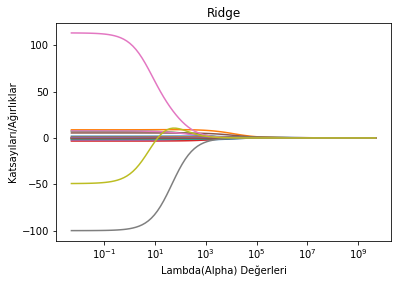

In [4]:
import numpy as np
import matplotlib.pyplot as plt

lambdas = 10**np.linspace(10, -2, 100)*0.5

ridge_model = Ridge()
coefficients = []

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdas, coefficients)
ax.set_xscale('log')

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayıları/Ağırlıklar")
plt.title("Ridge")
plt.show()

## Tahmin

In [5]:
from sklearn.metrics import mean_squared_error
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282844

## Model Tuning

In [6]:
from sklearn.linear_model import RidgeCV
lambdas = 10**np.linspace(10, -2, 100)*0.5
ridge_cv = RidgeCV(alphas = lambdas,
                  scoring = "neg_mean_squared_error",
                  normalize = True)

In [7]:
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

0.7599555414764666

In [8]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_, normalize=True).fit(X_train, y_train)

In [9]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

386.6826429756415

# Lasso Regresyon

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. Tibshirani 1996

\begin{gather*}
\large  SSE_{L_1} = { {\sum_{(i=1)}^n} (y_i - y'_i)^2 } + { \lambda {\sum_{(j=1)}^P} |\beta_j| }
\end{gather*}

ŷ = y'

* Ridge regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
* Lasso da katsayıları sıfıra yaklaştırır.
* Fakat L1 normu $\lambda$ yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi yapmış olur.
* $\lambda$'nın doğru seçilmesi çok önemlidir, burada da CV kullanılır.
* Ridge ve Lasso yöntemleri birbirinden üstün değildir.

$\lambda$ Ayar Parametresinin Belirlenmesi

* $\lambda$'nın sıfır olduğu yer EKK'dır. HKT'yi minimum yapan X'yi arıyoruz.
* $\lambda$ için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır.
* En küçük cross validation'i veren $\lambda$ ayar parametresi olarak seçilir.
* Son olarak seçilen bu $\lambda$ ile model yeniden tüm gözlemlere fit edilir.

In [10]:
# data preporcesing
import pandas as pd
from sklearn.model_selection import train_test_split
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df.select_dtypes(["object"])) 
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype("float64")
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model

In [11]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [12]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

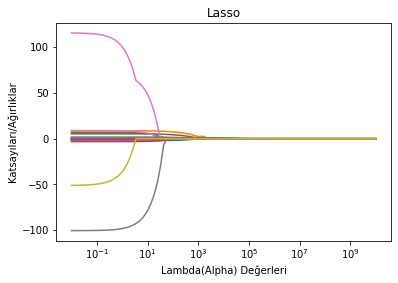

In [13]:
lambdas = 10**np.linspace(10, -2, 100)*0.5
lasso_model = Lasso()
coefficients = []

for i in lambdas:
    lasso_model.set_params(alpha=i)
    lasso_model.fit(X_train, y_train)
    coefficients.append(lasso_model.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayıları/Ağırlıklar")
plt.title("Lasso")
plt.show()

## Tahmin

In [14]:
from sklearn.metrics import mean_squared_error
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8330124299744

## Model Tuning

In [15]:
from sklearn.linear_model import LassoCV
lambdas = 10**np.linspace(10, -2, 100)*0.5
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter=10000, normalize = True).fit(X_train, y_train)

In [16]:
lasso_cv.alpha_

0.39406126432470073

In [17]:
lasso_tuned = Lasso(alpha=lasso_cv.alpha_).fit(X_train, y_train)

In [18]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958367

# ElasticNet Regresyon

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. ElasticNet L1 ve L2 yaklaşımlarını birleştirir. Zou & Hastie 2005

\begin{gather*}
\large {SSE_{Enet} = {\sum_{(i=1)}^n}(y_i - y'_i)^2}+{\lambda_1{\sum_{(j=1)}^P}(\beta_j)^2}+{\lambda_2 {\sum_{(j=1)}^P}|\beta_j|}
\end{gather*}

ŷ = y'

In [19]:
# data preporcesing
import pandas as pd
from sklearn.model_selection import train_test_split
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df.select_dtypes(["object"])) 
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype("float64")
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model

In [20]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model

ElasticNet()

In [21]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [22]:
enet_model.intercept_

-6.465955602113127

## Tahmin

In [23]:
from sklearn.metrics import mean_squared_error
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

## Model Tuning

In [24]:
from sklearn.linear_model import ElasticNetCV
enet_cv = ElasticNetCV(cv = 10, random_state=0).fit(X_train, y_train)

In [25]:
enet_cv.alpha_

5230.7647364798695

In [26]:
enet_tuned = ElasticNet(alpha=enet_cv.alpha_).fit(X_train, y_train)

In [27]:
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795

## Kaynaklar

### Kurslar
* https://www.udemy.com/course/python-egitimi/